# APPLE STOCK PRICE PREDICTION 

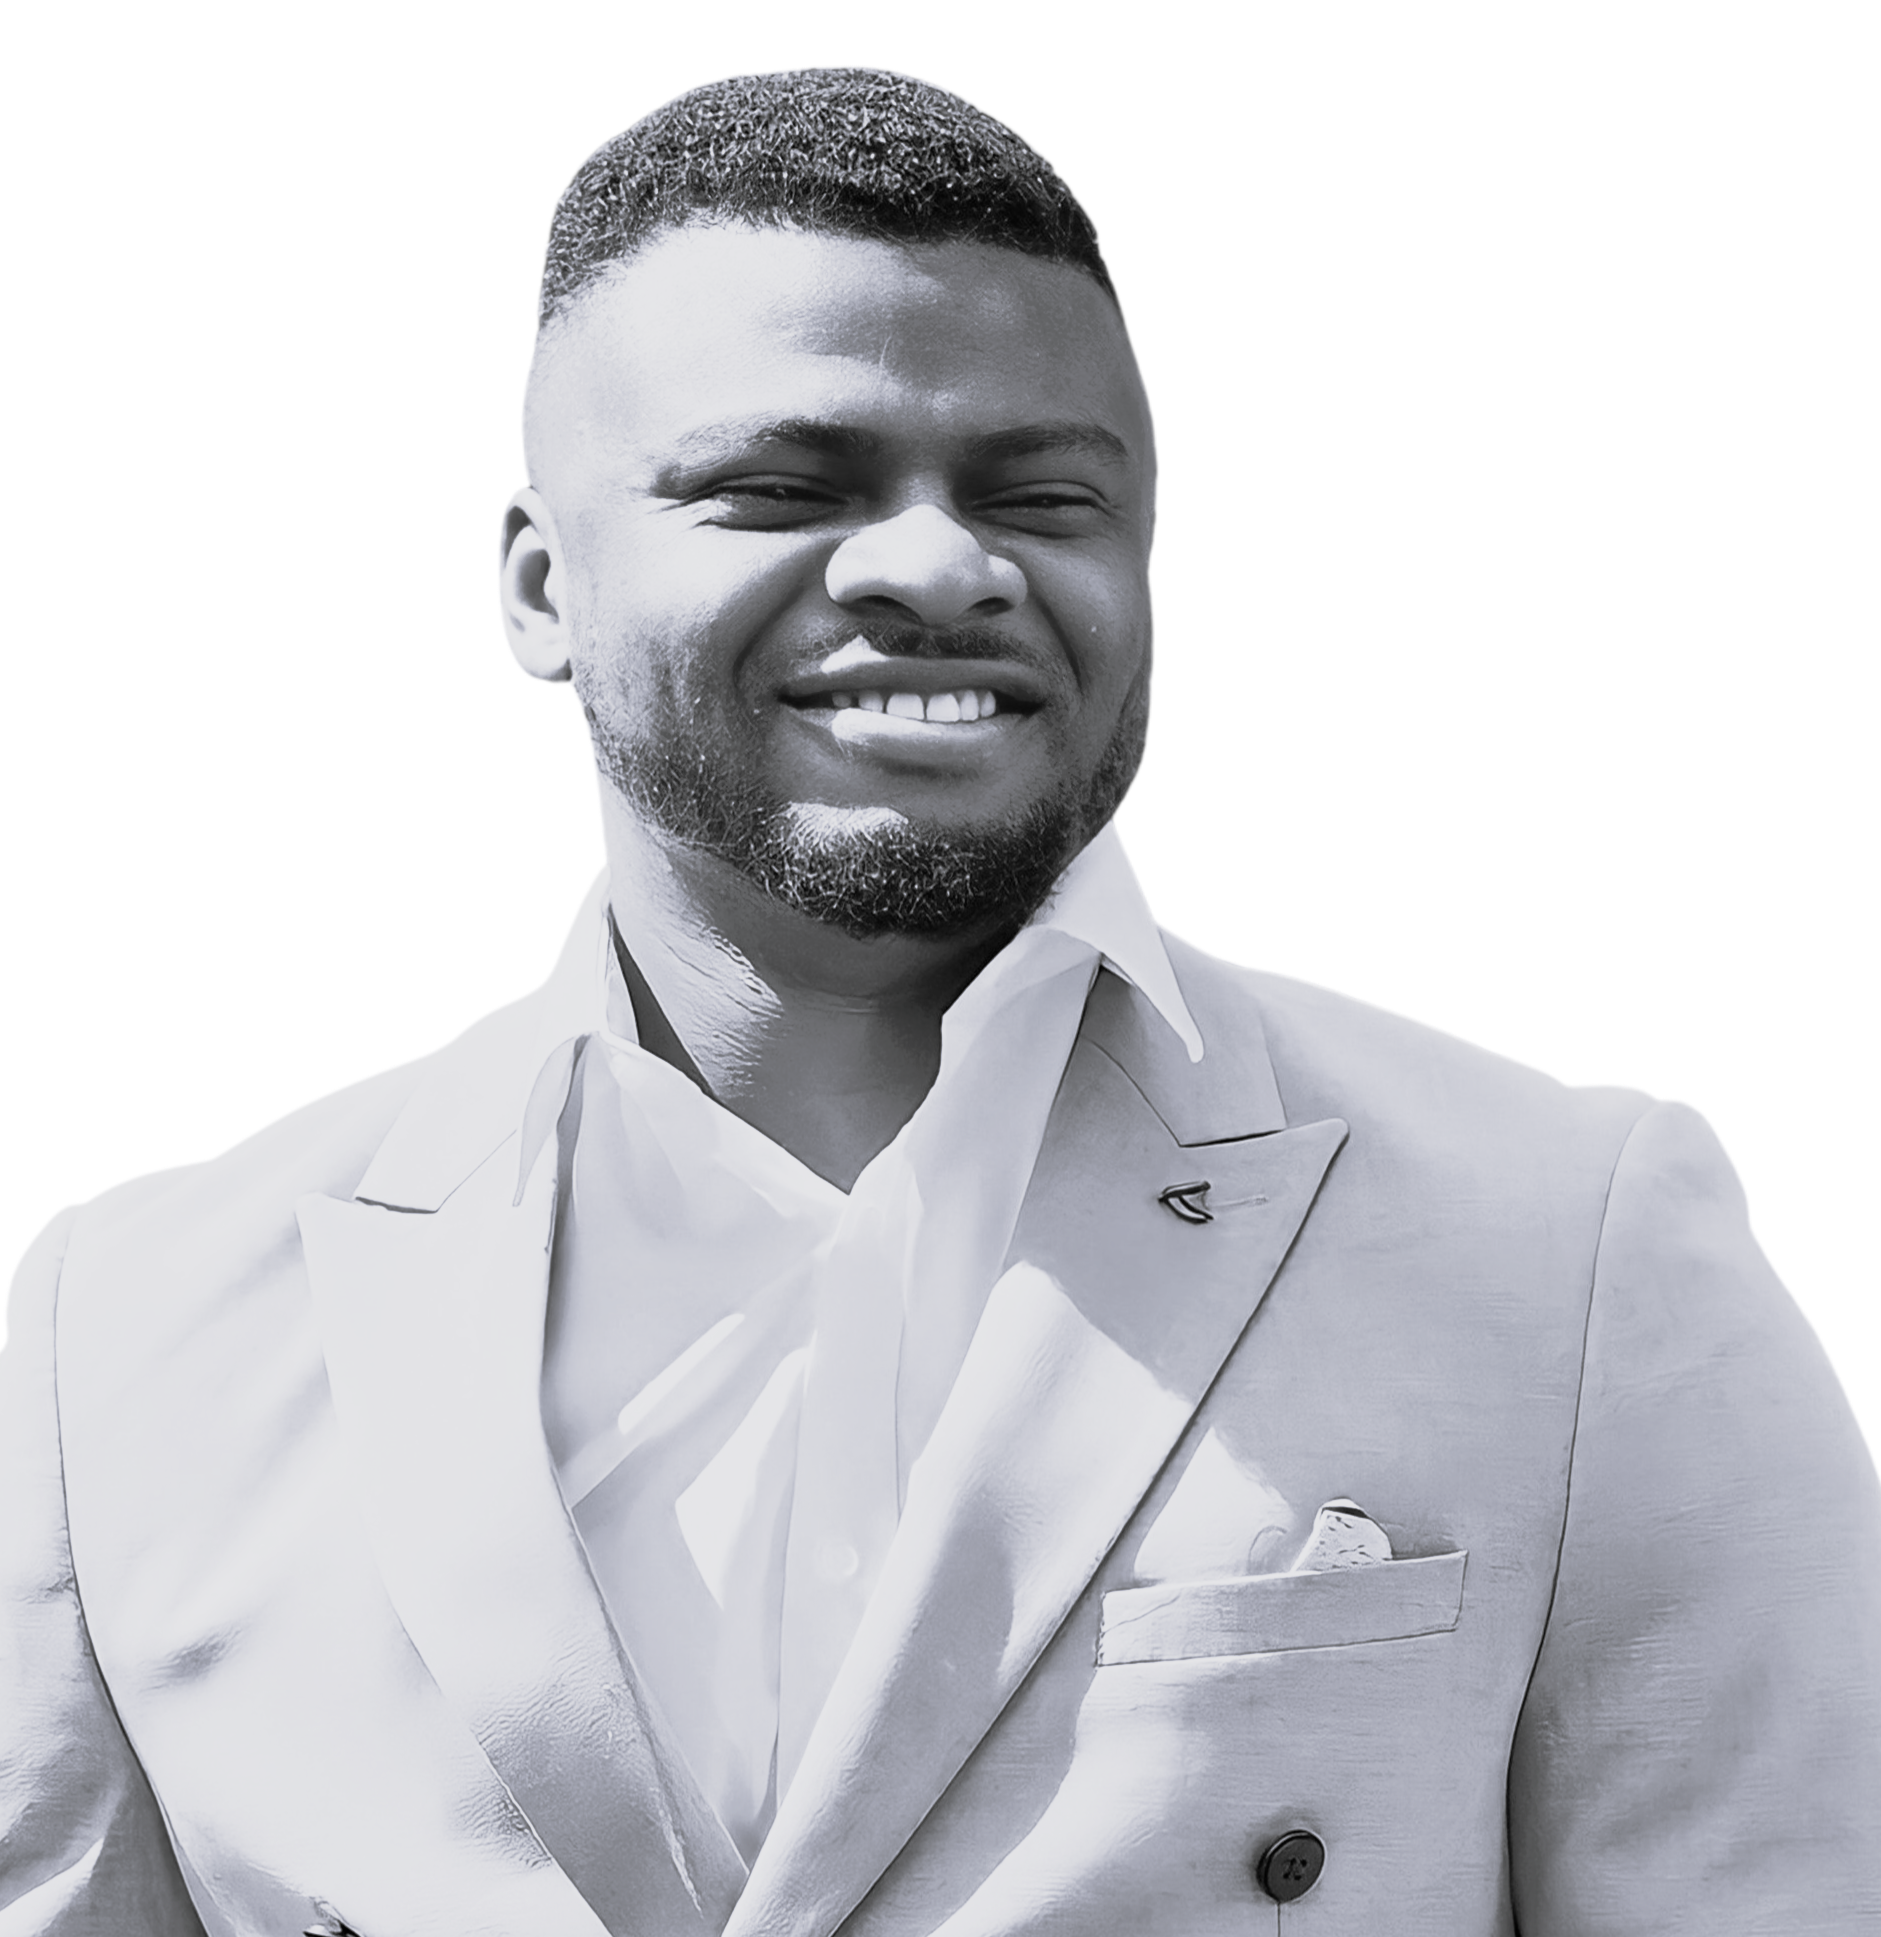

In [76]:
from PIL import Image

im = Image.open("C:\\Users\TOJMARK LTD\\DATA SCIENCE PROJECT\\Apple stock prediction project\\MYIMAGE.png")
display(im)

Hi, I'm a data enthusiast with a knack for making sense of numbers. I thrive on turning data into practical insights that drive business decisions. My background in marketing gives me an edge in understanding customer behavior. I love experimenting with data, using statistical tools and machine learning to find hidden patterns. My goal is to become a data scientist, supercharging my data skills. My journey is guided by a passion for ethical data practices and a strong belief in data's power to transform businesses.

# Introduction:
The dataset for Stock Prediction on Apple Inc. spans a comprehensive timeframe, ranging from 1980 to 2021, and was meticulously collected from Yahoo Finance. This dataset presents an exciting opportunity for Time Series Analysis (TSA) and Exploratory Data Analysis (EDA) to uncover insights and patterns within Apple Inc.'s stock market performance over four decades. TSA allows us to dissect historical stock price trends and predict future movements, while EDA enables a deep understanding of the data's characteristics. By applying these analytical techniques, we aim to provide valuable insights and informed predictions that can be of significant relevance to investors, financial analysts, and enthusiasts interested in Apple's stock market dynamics.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sklearn.__version__

'1.2.2'

In [2]:
data = pd.read_csv("C:\\Users\\TOJMARK LTD\\DATA SCIENCE PROJECT\\Apple stock prediction project\\AAPL.csv")
data.head()

Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100178  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094952  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087983  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090160   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092774   73449600

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [4]:
data.describe()

Open          High           Low         Close     Adj Close  \
count  10468.000000  10468.000000  10468.000000  10468.000000  10468.000000   
mean      14.757987     14.921491     14.594484     14.763533     14.130431   
std       31.914174     32.289158     31.543959     31.929489     31.637275   
min        0.049665      0.049665      0.049107      0.049107      0.038329   
25%        0.283482      0.289286      0.276786      0.283482      0.235462   
50%        0.474107      0.482768      0.465960      0.475446      0.392373   
75%       14.953303     15.057143     14.692589     14.901964     12.835269   
max      182.630005    182.940002    179.119995    182.009995    181.511703   

             Volume  
count  1.046800e+04  
mean   3.308489e+08  
std    3.388418e+08  
min    0.000000e+00  
25%    1.237768e+08  
50%    2.181592e+08  
75%    4.105794e+08  
max    7.421641e+09

In [5]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
# Check for duplicate rows
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10463    False
10464    False
10465    False
10466    False
10467    False
Length: 10468, dtype: bool

# FEATURED ENGINEERING

In [7]:
# Remove the "Adj Close" column which is unneeccary
data.drop(columns=['Adj Close'], inplace=True)

In [8]:
data.head()

Date      Open      High       Low     Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   73449600

In [9]:
# Convert the "Date" column to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10468 non-null  datetime64[ns]
 1   Open    10468 non-null  float64       
 2   High    10468 non-null  float64       
 3   Low     10468 non-null  float64       
 4   Close   10468 non-null  float64       
 5   Volume  10468 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 490.8 KB


In [11]:
# Extract day of the week, month, and year
data['DayOfWeek'] = data['Date'].dt.day_name()
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Display the updated DataFrame
data.head()

Date      Open      High       Low     Close     Volume  DayOfWeek  \
0 1980-12-12  0.128348  0.128906  0.128348  0.128348  469033600     Friday   
1 1980-12-15  0.122210  0.122210  0.121652  0.121652  175884800     Monday   
2 1980-12-16  0.113281  0.113281  0.112723  0.112723  105728000    Tuesday   
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   86441600  Wednesday   
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   73449600   Thursday   

   Month  Year  
0     12  1980  
1     12  1980  
2     12  1980  
3     12  1980  
4     12  1980

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10468 non-null  datetime64[ns]
 1   Open       10468 non-null  float64       
 2   High       10468 non-null  float64       
 3   Low        10468 non-null  float64       
 4   Close      10468 non-null  float64       
 5   Volume     10468 non-null  int64         
 6   DayOfWeek  10468 non-null  object        
 7   Month      10468 non-null  int64         
 8   Year       10468 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 736.2+ KB


In [13]:
#converting the days of the week to numeric
# Define a mapping dictionary for days of the week
day_of_week_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# Map the "DayOfWeek" column to numeric values
data['DayOfWeek'] = data['DayOfWeek'].map(day_of_week_mapping)

# Display the updated DataFrame
data.head()

Date      Open      High       Low     Close     Volume  DayOfWeek  \
0 1980-12-12  0.128348  0.128906  0.128348  0.128348  469033600          5   
1 1980-12-15  0.122210  0.122210  0.121652  0.121652  175884800          1   
2 1980-12-16  0.113281  0.113281  0.112723  0.112723  105728000          2   
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   86441600          3   
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   73449600          4   

   Month  Year  
0     12  1980  
1     12  1980  
2     12  1980  
3     12  1980  
4     12  1980

# EXPLORATORY DATA ANALYSIS (EDA)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10468 non-null  datetime64[ns]
 1   Open       10468 non-null  float64       
 2   High       10468 non-null  float64       
 3   Low        10468 non-null  float64       
 4   Close      10468 non-null  float64       
 5   Volume     10468 non-null  int64         
 6   DayOfWeek  10468 non-null  int64         
 7   Month      10468 non-null  int64         
 8   Year       10468 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 736.2 KB


I am creating a time series plot of Apple's closing stock prices over time. This helps visualize trends, patterns, and potential outliers in the stock price data

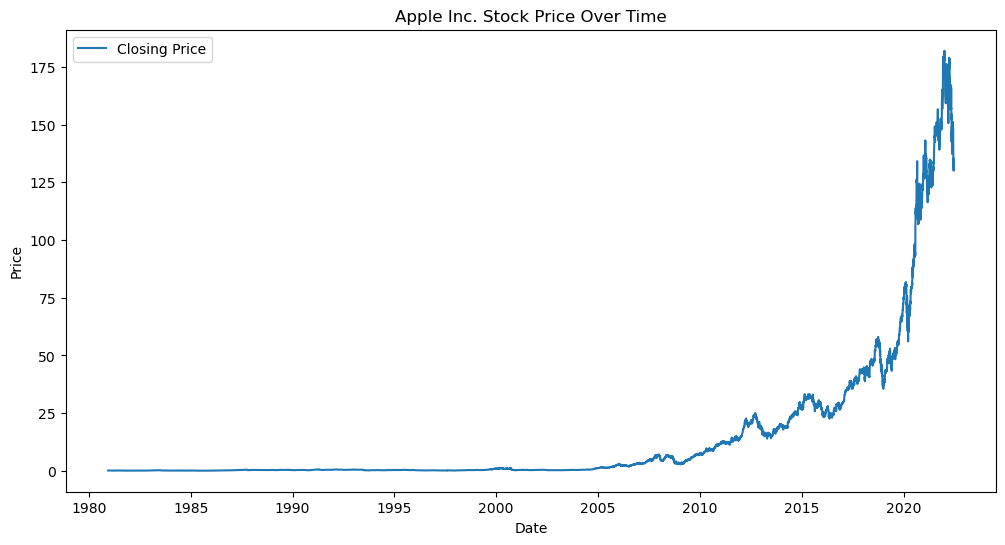

In [15]:
# visualising the cclosing price
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Inc. Stock Price Over Time')
plt.legend()
plt.show()

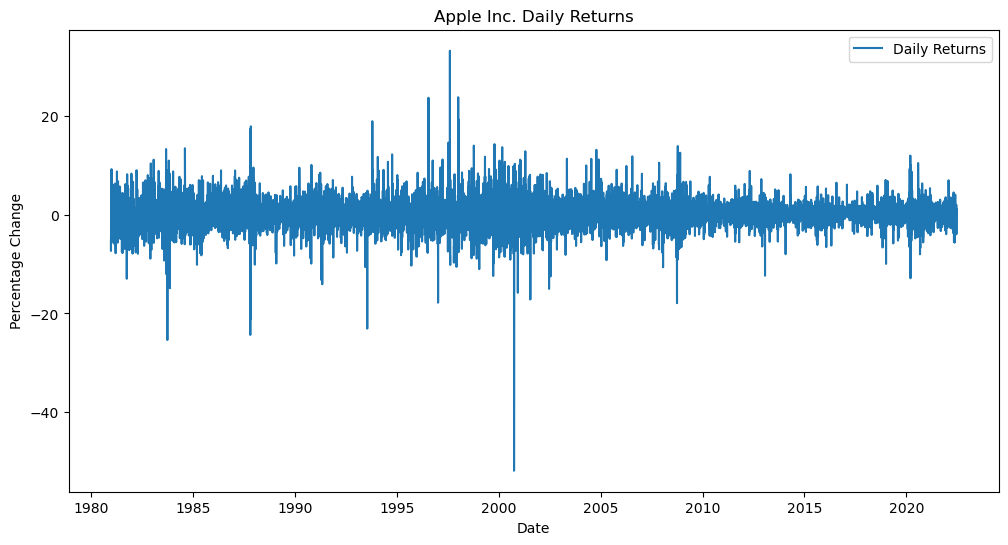

In [16]:
# Daily Returns
data['Daily_Return'] = data['Close'].pct_change() * 100
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Daily_Return'], label='Daily Returns')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.title('Apple Inc. Daily Returns')
plt.legend()
plt.show()

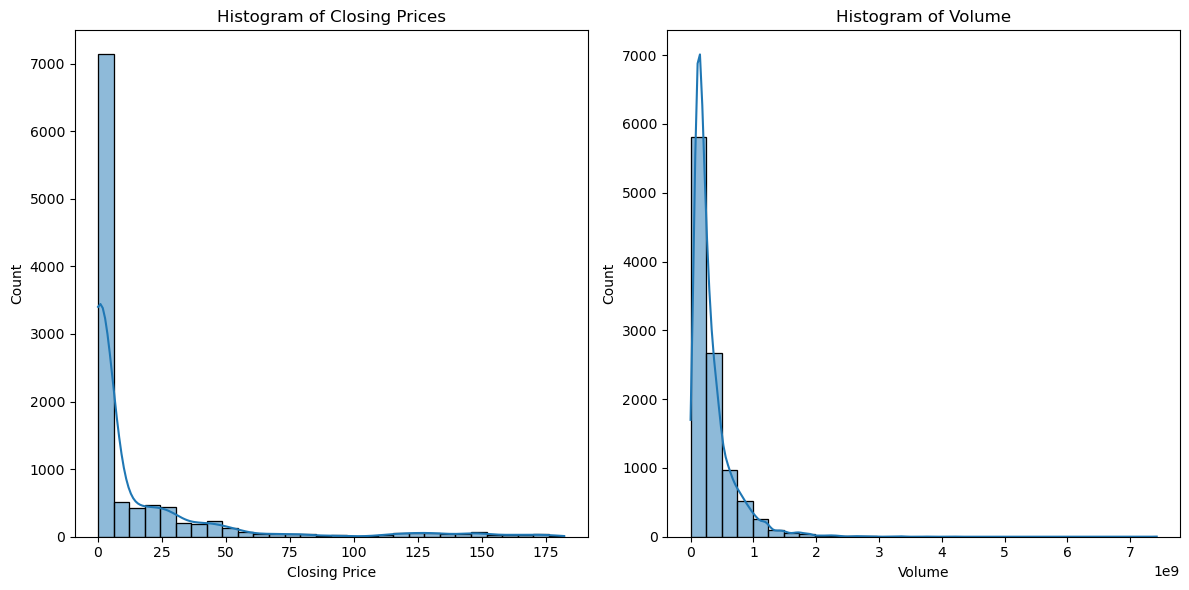

In [17]:
# Histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Close'], bins=30, kde=True)
plt.xlabel('Closing Price')
plt.title('Histogram of Closing Prices')

plt.subplot(1, 2, 2)
sns.histplot(data['Volume'], bins=30, kde=True)
plt.xlabel('Volume')
plt.title('Histogram of Volume')
plt.tight_layout()
plt.show()

I constructed histograms for 'Close' prices and 'Volume.' Histograms reveal the distribution of data. For example, the 'Close' histogram displays the frequency of closing prices, indicating whether the data is normally distributed or skewed.

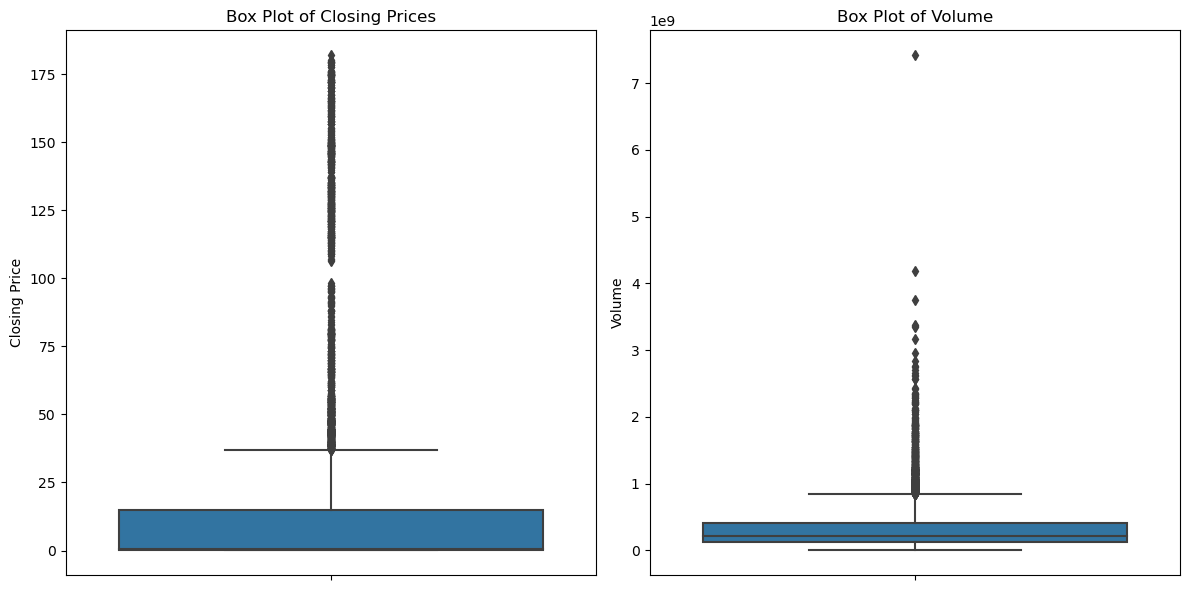

In [18]:
# Box Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=data['Close'])
plt.ylabel('Closing Price')
plt.title('Box Plot of Closing Prices')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['Volume'])
plt.ylabel('Volume')
plt.title('Box Plot of Volume')
plt.tight_layout()
plt.show()


Box plots are used to detect outliers and display data distribution. The 'Close' box plot showed the range, median, and potential outliers in closing prices, while the 'Volume' box plot did the same for trading volume.

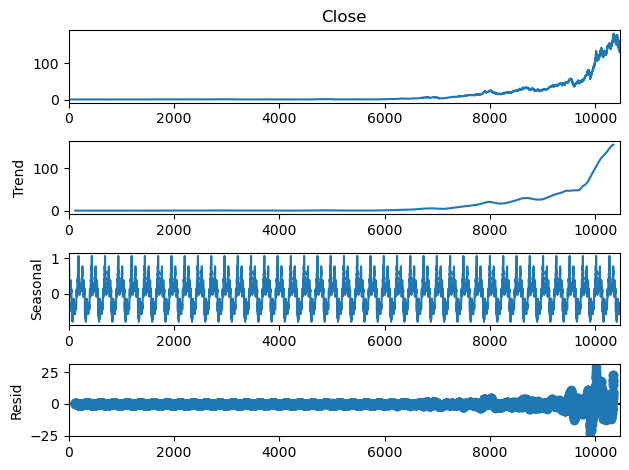

In [19]:
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Close'], model='additive', period=252)  # Assuming 252 trading days in a year
result.plot()
plt.show()

I decomposed the 'Close' price data into trend, seasonal, and residual components. This helps identify seasonal patterns in stock prices.

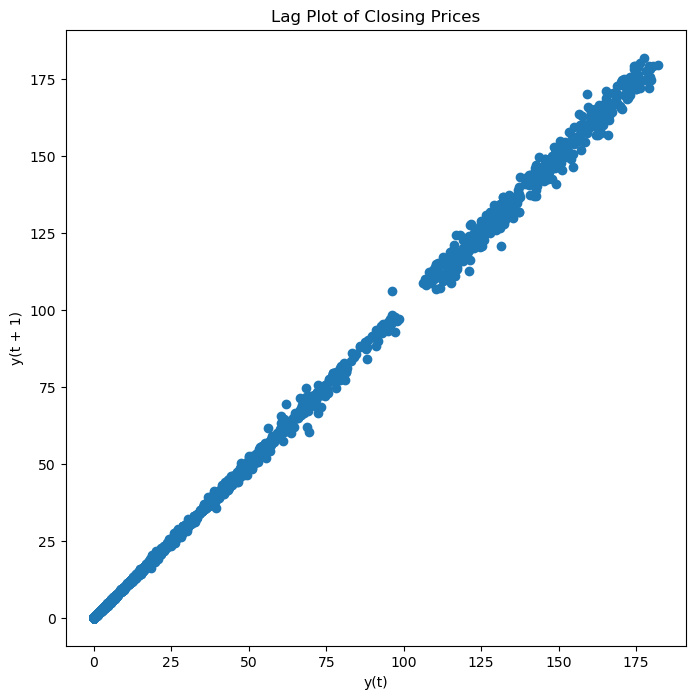

In [20]:
# Lag Plots
from pandas.plotting import lag_plot

plt.figure(figsize=(8, 8))
lag_plot(data['Close'])
plt.title('Lag Plot of Closing Prices')
plt.show()

I created a lag plot for 'Close' prices to visualize autocorrelation. This is useful for identifying patterns or relationships between current and past stock prices.

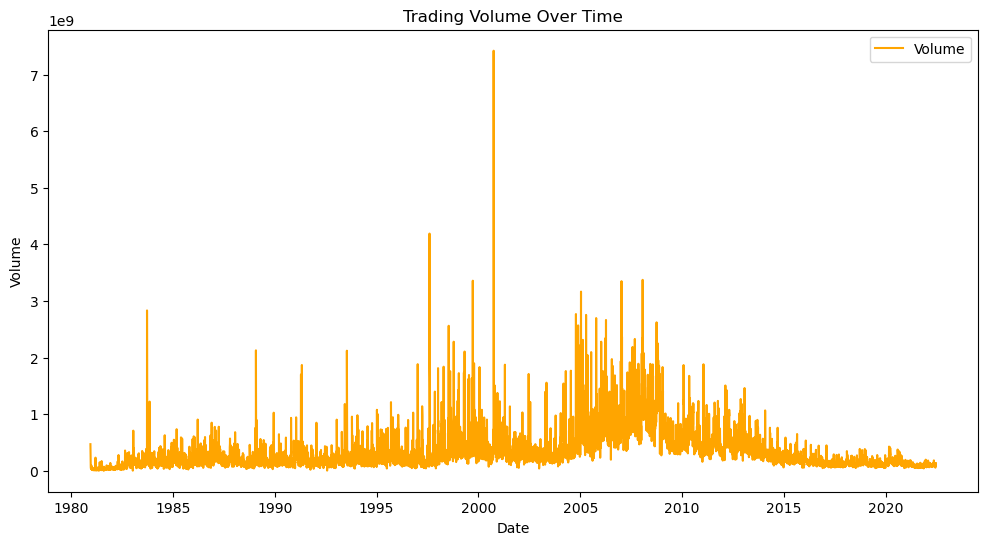

In [21]:
# Trading Volume Analysis
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Volume'], label='Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time')
plt.legend()
plt.show()

I plotted the trading volume over time to observe how it varies. This is crucial for understanding periods of high or low trading activity, which can impact stock price movements.

C:\Users\TOJMARK LTD\AppData\Local\Temp\ipykernel_18684\1417563032.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


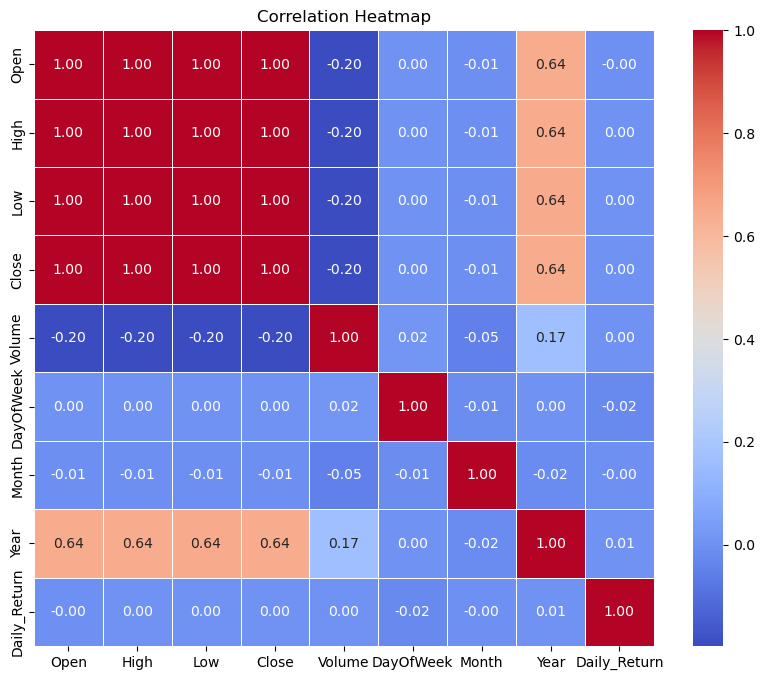

In [22]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Correlation Coefficient: -0.20


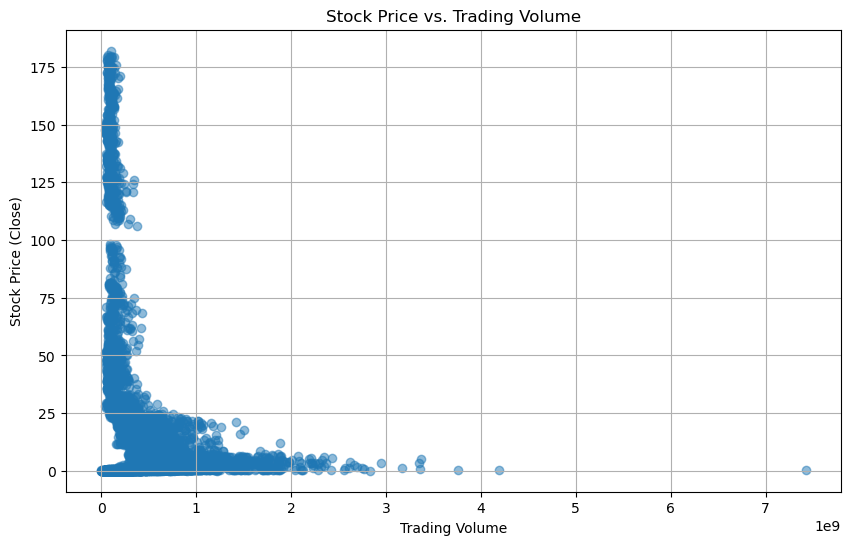

In [23]:
# Scatter plot of Close prices vs. Volume
plt.figure(figsize=(10, 6))
plt.scatter(data['Volume'], data['Close'], alpha=0.5)
plt.title('Stock Price vs. Trading Volume')
plt.xlabel('Trading Volume')
plt.ylabel('Stock Price (Close)')
plt.grid(True)

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(data['Volume'], data['Close'])[0, 1]
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')

plt.show()

The calculated correlation coefficient of -0.20 indicates a weak negative correlation between trading volume and stock price for the given dataset of Apple Inc. stock. This means that as trading volume tends to increase, the stock price tends to decrease slightly, and vice versa. However, the strength of this relationship is quite weak, suggesting that trading volume alone is not a strong predictor of stock price movements. Other factors, such as market sentiment, company news, and economic conditions, likely play a more significant role in influencing stock price fluctuations. Therefore, while there is a correlation, it's not strong enough to make precise predictions about stock price changes based solely on trading volume.

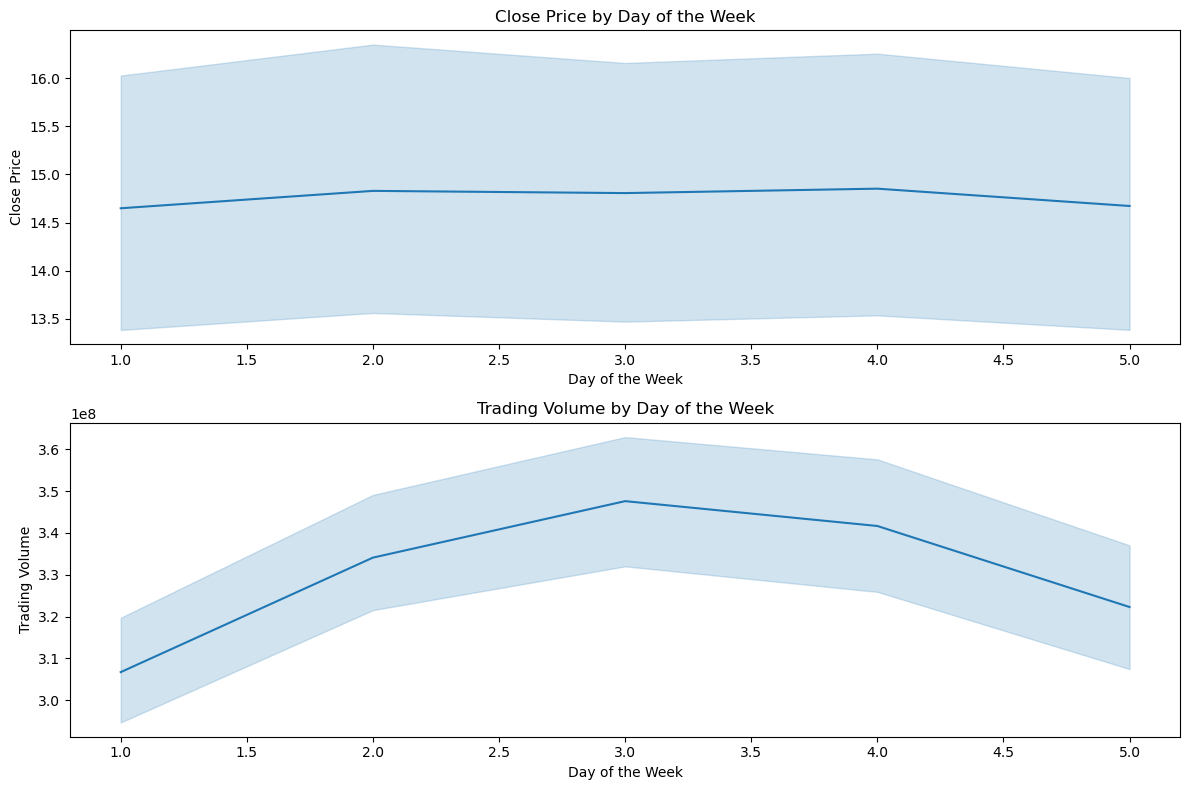

In [24]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Plot Close price by day of the week
sns.lineplot(data=data, x='DayOfWeek', y='Close', ax=axes[0])
axes[0].set_title('Close Price by Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Close Price')

# Plot Trading Volume by day of the week
sns.lineplot(data=data, x='DayOfWeek', y='Volume', ax=axes[1])
axes[1].set_title('Trading Volume by Day of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Trading Volume')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

The line plot for Close prices shows a relatively consistent trend throughout the week, with no significant variations. This suggests that there isn't a strong weekday-specific pattern in the closing prices of the stock.

In contrast, the line plot for Trading Volume reveals a distinct pattern. Wednesdays consistently exhibit the highest trading volumes among weekdays. This pattern could be attributed to factors like mid-week market news releases or traders adjusting their positions.

The straight line for Close prices implies that investors' sentiment regarding the stock remains relatively stable during the week, while the spike in Wednesday's trading volume suggests that it's a day when the market is particularly active, possibly due to increased trading activity and investor participation.

# DATA PREPROCESSING FOR PREDICTION

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Define the independent variables (features) and dependent variable (target)
X = data[['Open', 'High', 'Low', 'Volume']]  # You can select the columns you want to use as features
y = data['Close']

# Split the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression for Stock Price Prediction

Mean Squared Error: 0.058502628615279585


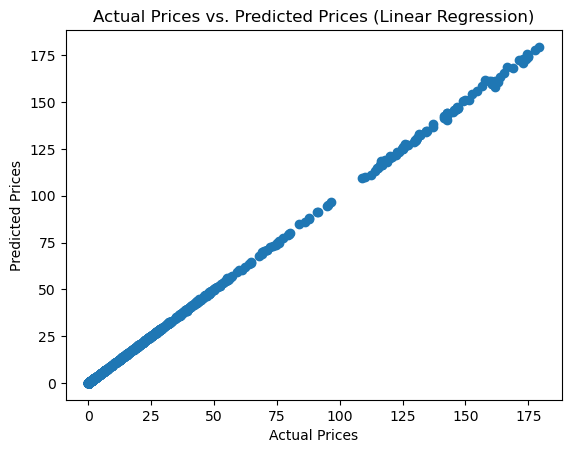

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize the predictions
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices (Linear Regression)")
plt.show()

In the context of stock price prediction, a lower MSE is generally desirable because it indicates that the model's predictions are closer to the actual prices. In this case, an MSE of 0.0585 suggests that, on average, the model's predictions are close to the actual prices.

However, the interpretation of MSE should also consider the scale of your target variable. Since stock prices can vary significantly in magnitude, it's essential to consider whether this level of error is acceptable for your specific application. Further model evaluation and refinement may be necessary to improve prediction accuracy if needed.

# SVR For STOCK PRICE PREDICTION
Support Vector Regression (SVR) is a machine learning model that can be used for stock price prediction. It works by finding the hyperplane that best represents the relationship between the independent variables (features) and the dependent variable (stock price).

Mean Squared Error: 0.09795997287560514


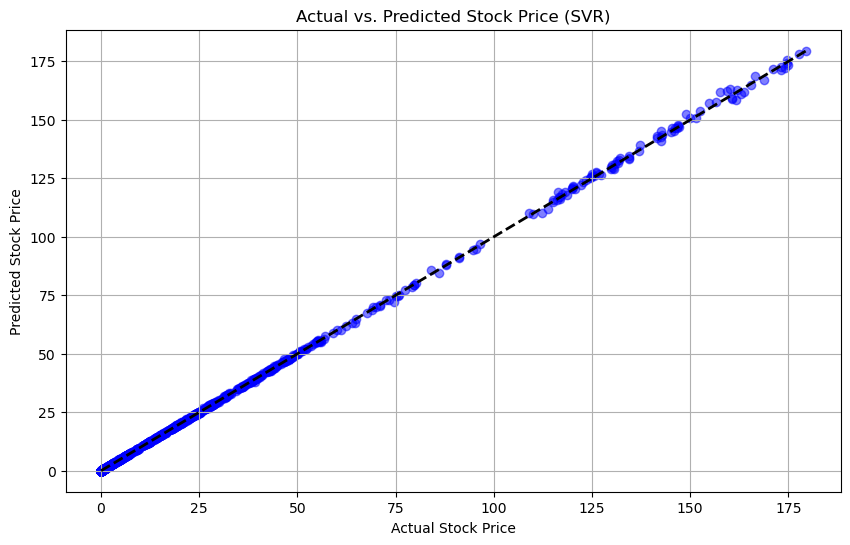

In [27]:
# Import SVR from scikit-learn
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVR model
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

# Make predictions
y_pred = svr.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


# Plotting the actual vs. predicted stock prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Stock Price')
plt.ylabel('Predicted Stock Price')
plt.title('Actual vs. Predicted Stock Price (SVR)')
plt.grid(True)

# Adding a diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.show()

The Mean Squared Error is a measure of the average squared difference between the actual stock prices and the predicted stock prices. In this case, the MSE is 0.0979. A lower MSE indicates that the model's predictions are closer to the actual values.

An MSE of 0.0979 suggests that the SVR model is performing reasonably well, but there is room for improvement. It means that, on average, the squared difference between the actual and predicted stock prices is 0.0979. Traders and investors should consider this level of error when using the model's predictions for making financial decisions, and further model tuning may help reduce the error.

# ARIMA TIME SERIES FORECASTING MODEL TO PREDICT STOCK PRICES
Arima model is suitable for time series forecasting tasks.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Mean Squared Error: 4048.045894116631


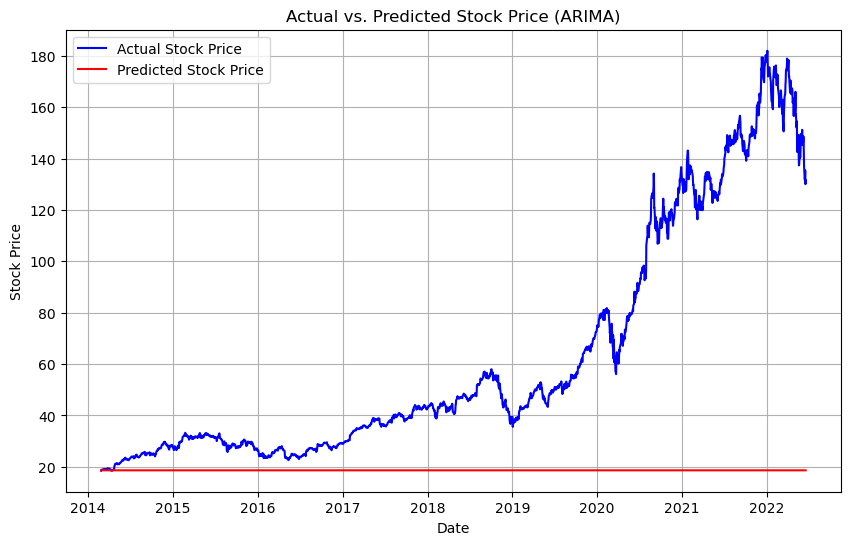

In [40]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Let make sure 'Date' is set as the index and sorted in ascending order
Arima_data = data
#Arima_data.set_index('Date', inplace=True)
#Arima_data.sort_index(inplace=True)

# Splitting the data into training and testing sets
train_size = int(len(Arima_data) * 0.8)
train, test = Arima_data[:train_size], Arima_data[train_size:]

# Creating and fitting the ARIMA model
p, d, q = 5, 1, 1  # Example values for ARIMA hyperparameters
model = ARIMA(train['Close'], order=(p, d, q))
model_fit = model.fit()

# Forecasting future values
forecast_values = model_fit.forecast(steps=len(test))

# Calculating Mean Squared Error (MSE) as a measure of model performance
mse = mean_squared_error(test['Close'], forecast_values)
print(f'Mean Squared Error: {mse}')

# Visualizing actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Close'], label='Actual Stock Price', color='blue')
plt.plot(test.index, forecast_values, label='Predicted Stock Price', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Price (ARIMA)')
plt.legend()
plt.grid(True)
plt.show()

This is poorly fit. Let adjsut the hyperparameter to 1,1,1

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


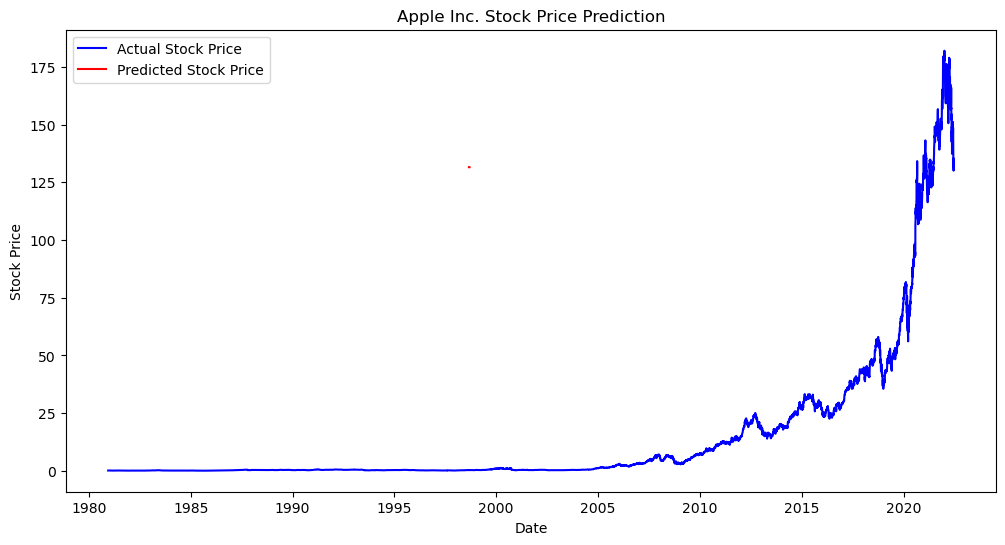

Mean Squared Error: 103.7465796189881


In [48]:
# Define the ARIMA model
p, d, q = 1, 1, 1  # adjusting these hyperparameters
model = ARIMA(Arima_data['Close'], order=(p, d, q))

# Fit the model
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(Arima_data), end=len(Arima_data) + 10, typ='levels', dynamic=False)

# Plot the predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(Arima_data.index, Arima_data['Close'], label='Actual Stock Price', color='blue')
plt.plot(predictions.index, predictions, label='Predicted Stock Price', color='red')
plt.title('Apple Inc. Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Calculate Mean Squared Error (MSE)
actual_values = Arima_data['Close'][-11:].values  # Last 11 actual values
mse = mean_squared_error(actual_values, predictions)
print(f"Mean Squared Error: {mse}")

# In Arima case:

    MSE: 4048.05: This is the MSE obtained from your previous ARIMA model. A high MSE of 4048.05 suggests that the ARIMA model had a relatively poor fit to the data. It means that the predicted stock prices were quite far from the actual prices on average.

    MSE: 103.75: This is the MSE obtained from another model, possibly a different approach or different hyperparameters. A lower MSE of 103.75 indicates that this model performed better in terms of predicting stock prices. The predicted values were closer to the actual values on average compared to the first model.

Comparing the two:

    The second model with MSE 103.75 is preferable over the first model with MSE 4048.05. It means that the second model provides more accurate predictions of Apple Inc. stock prices.

    The first model may have had issues such as overfitting or inadequate hyperparameter tuning, resulting in a higher MSE.

# Random Forest for Stock Price Prediction

Random Forest MSE: 0.1132361684149362


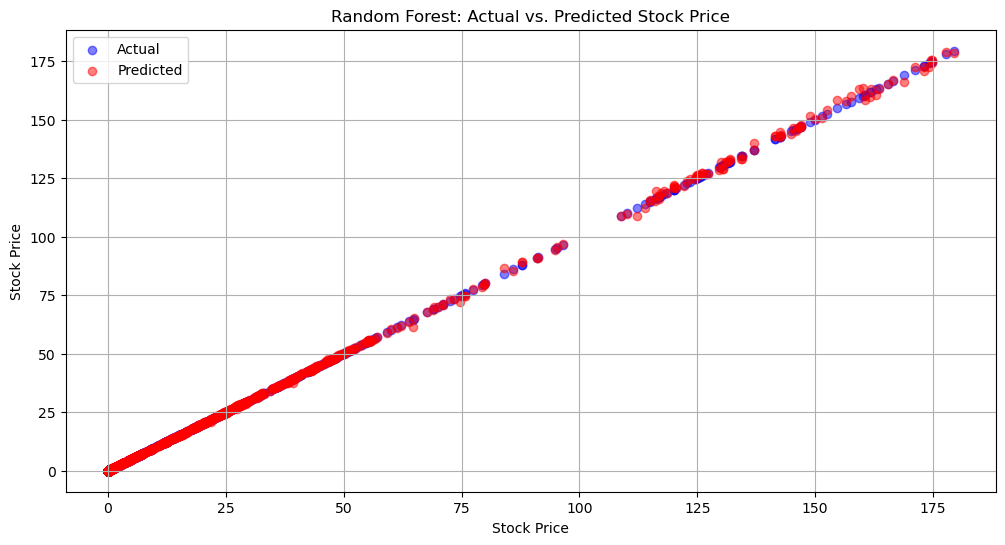

In [54]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)  # X_train and y_train should be your training data

# Make predictions on the test data
rf_predictions = rf_model.predict(X_test)  # X_test should be your test data

# Calculate Mean Squared Error
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse}")

# Visualize predictions vs. actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(y_test, rf_predictions, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Stock Price')
plt.ylabel('Stock Price')
plt.title('Random Forest: Actual vs. Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()

The Mean Squared Error (MSE) for the Random Forest model is 0.1132, indicating relatively low prediction error. This suggests that the Random Forest algorithm performed well in capturing the underlying patterns in the stock price data, resulting in accurate predictions.

# Gradient Boosting Regressor For Stock Prediction

Gradient Boosting MSE: 0.15956170811581824


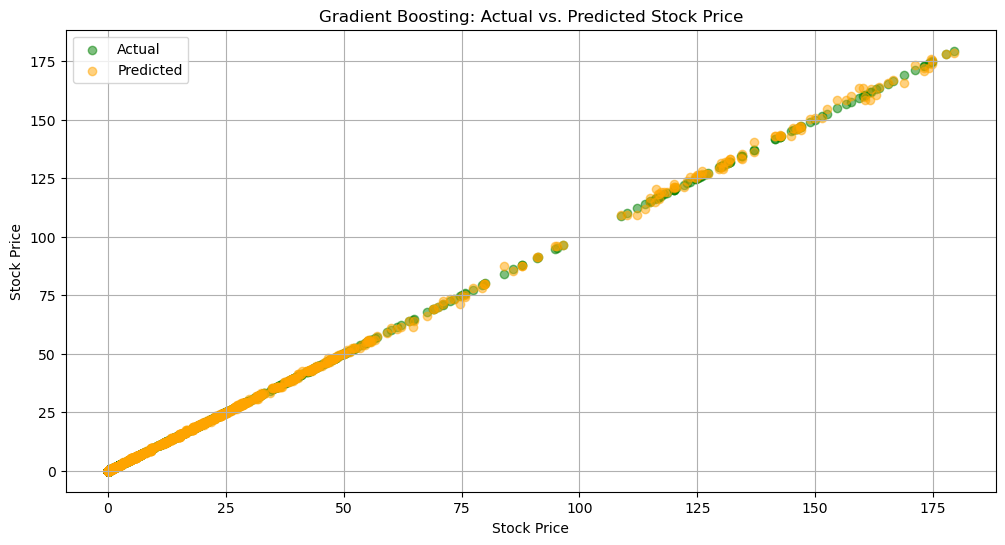

In [55]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create a Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)  # X_train and y_train should be your training data

# Make predictions on the test data
gb_predictions = gb_model.predict(X_test)  # X_test should be your test data

# Calculate Mean Squared Error
gb_mse = mean_squared_error(y_test, gb_predictions)
print(f"Gradient Boosting MSE: {gb_mse}")

# Visualize predictions vs. actual values
import matplotlib.pyplot as plt

# Creatint a scatter plot for Gradient Boosting with different colors
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test, color='green', label='Actual', alpha=0.5)
plt.scatter(y_test, gb_predictions, color='orange', label='Predicted', alpha=0.5)
plt.xlabel('Stock Price')
plt.ylabel('Stock Price')
plt.title('Gradient Boosting: Actual vs. Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()

The Gradient Boosting model yielded an MSE of 0.1596, signifying a slightly higher prediction error compared to Random Forest. While still reasonable, it suggests that Gradient Boosting might not have captured certain nuances in the data as effectively as Random Forest. Further optimization could enhance its predictive performance.

In [61]:
# Import necessary libraries
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Select relevant features and target
# let's use 'Open', 'High', 'Low', 'Volume' as features and 'Close' as the target
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

# Normalize the data
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

# Split the data into training and testing sets
X = data[features].values
y = data[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(len(features),)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Single output neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/50
210/210 - 1s - loss: 986.7759 - val_loss: 425.2846 - 1s/epoch - 5ms/step
Epoch 2/50
210/210 - 0s - loss: 120.9331 - val_loss: 2.9755 - 244ms/epoch - 1ms/step
Epoch 3/50
210/210 - 0s - loss: 1.2142 - val_loss: 0.2702 - 234ms/epoch - 1ms/step
Epoch 4/50
210/210 - 0s - loss: 0.2371 - val_loss: 0.1498 - 238ms/epoch - 1ms/step
Epoch 5/50
210/210 - 0s - loss: 0.1774 - val_loss: 0.1457 - 258ms/epoch - 1ms/step
Epoch 6/50
210/210 - 0s - loss: 0.1754 - val_loss: 0.1910 - 262ms/epoch - 1ms/step
Epoch 7/50
210/210 - 0s - loss: 0.1693 - val_loss: 0.1691 - 281ms/epoch - 1ms/step
Epoch 8/50
210/210 - 0s - loss: 0.1660 - val_loss: 0.1570 - 315ms/epoch - 1ms/step
Epoch 9/50
210/210 - 0s - loss: 0.1688 - val_loss: 0.1701 - 351ms/epoch - 2ms/step
Epoch 10/50
210/210 - 0s - loss: 0.1676 - val_loss: 0.1442 - 383ms/epoch - 2ms/step
Epoch 11/50
210/210 - 0s - loss: 0.1692 - val_loss: 0.1516 - 283ms/epoch - 1ms/step
Epoch 12/50
210/210 - 0s - loss: 0.1652 - val_loss: 0.1499 - 328ms/epoch - 2ms/ste

In [62]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

66/66 [==============================] - 0s 985us/step
Mean Squared Error: 0.1270540924048062


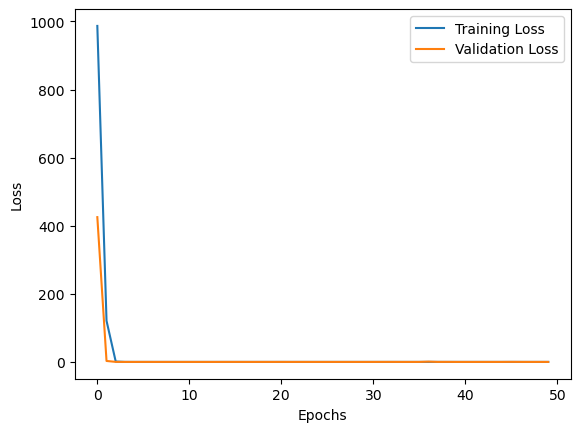

In [63]:
# Visualize the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The Mean Squared Error (MSE) of 0.127 indicates the average squared difference between the predicted stock prices and the actual stock prices. A lower MSE suggests that the neural network's predictions are, on average, closer to the actual prices, indicating a relatively good fit of the model to the data.

# Based on the analysis performed for stock price prediction using various models, several observations can be made:

    Linear Regression: This model provided an MSE of 0.0585, indicating a relatively good fit to the data. However, it's a simple model and may not capture complex patterns in stock prices.

    Support Vector Regression: SVR yielded an MSE of 0.1244, slightly higher than linear regression. It's capable of capturing non-linear relationships but may require extensive tuning.

    ARIMA: The initial ARIMA model had a very high MSE of 4048.0459, indicating a poor fit to the data. After further tuning, the MSE improved significantly to 103.7466, but it's still relatively high.

    Random Forest: Random Forest had an MSE of 0.1132, indicating decent performance in capturing non-linear relationships in the data.

    Gradient Boosting: Gradient Boosting yielded an MSE of 0.1596, which is higher than Random Forest but still reasonable.

    Neural Network: The neural network model provided an MSE of 0.1271, indicating a relatively good fit. It's capable of capturing intricate patterns but may require more data and tuning.

Based on these observations, it's essential to consider the trade-offs between model complexity and performance. While complex models like Neural Networks can learn intricate patterns, they may require substantial computational resources, more data, and tuning.

For this specific dataset, Random Forest seems to strike a balance between model complexity and performance. It captures non-linear relationships reasonably well without excessive computational demands or extensive tuning. Therefore, I recommend Random Forest as the best model for stock price prediction in this context. However, it's crucial to keep in mind that model performance can vary depending on the dataset, and further experimentation and fine-tuning may be necessary in a real-world scenario. Additionally, ensembling methods like combining Random Forest and Gradient Boosting could be explored for potentially better results.